## Demonstration: apply a k-means clustering algorithm

In this example, we’ll investigate how to apply a k-means clustering algorithm to a real-life scenario. The data set does not have clear groups/classes/labels. Therefore, we will 'ask' Python to perform statistical calculations and determine the relation between data points, aka clusters. We want to identify the relevant clusters for customer reactions and comments on a live selling website.

##### Live selling is a practice where retailers sell their products on a social media livestream (a video that is broadcast in real time to consumers). As a sales technique, live selling – sometimes referred to as social selling – is valuable for businesses because:

• it shortens the sales funnel (i.e. the time from when a customer first becomes aware of a product or service to the time of them purchasing the product or service)


• it enhances the customer journey with personalised messaging. 


Because live selling happens in real time on social media platforms, consumers can synchronously engage with streams by using emojis, comments, or ‘reacts’. These, in turn, provide immediate feedback (valuable data) to the sellers, enabling them to respond to increase the probability of a future sale. 

In terms of enabling sales teams, LinkedIn’s research indicates that sales representatives who scored high on the Social Selling Index (SSI) scouted 45% more sales opportunities, were 51% more likely to hit their quotas, and outsold non-social-selling sales professionals by as much as 78% (LinkedIn 2022). 

You’ve been asked to analyse the data, determine the variability of consumer engagement, and highlight the changes induced by the use of Facebook Live. For this exercise, you’ll only investigate the effect of reactions and comments received. We will break down the worked example into nine steps.

# 1. Prepare the workstation

In [17]:
# [1] import libraries
import pandas as pd
import numpy as np

# [2] read the csv file
df_fb = pd.read_csv("FB.csv")

# [3] view the DataFrame
print(df_fb.shape)
print(df_fb.dtypes)
df_fb.head()

(13397, 14)
fb_id         int64
medium       object
published    object
reactions     int64
comments      int64
share         int64
like          int64
love          int64
excellent     int64
funny         int64
sad           int64
angry         int64
yes           int64
no            int64
dtype: object


fb_id medium        published  reactions  comments  share  like  love  \
0  12987653  video   4/22/2018 6:00        529       512    262   432    92   
1  12987654  photo  4/21/2018 22:45        150         0      0   150     0   
2  12987655  photo   3/21/2017 0:24         33         9      1    33     0   
3  12987656  photo   3/21/2017 0:23         72         1      0    72     0   
4  12987657  photo   3/21/2017 0:13        174         0      0   173     1   

   excellent  funny  sad  angry  yes  no  
0          3      1    1      0    1   0  
1          0      0    0      0    1   0  
2          0      0    0      0    0   1  
3          0      0    0      0    0   1  
4          0      0    0      0    0   1

# 2. Evaluate the variables

Before you can begin, you need to determine whether the data in its current state is fit for k-means clustering. We don't, for example, want variables that are unique and that can't contribute to a cluster. 

To do this, check the summary of the numeric variable with the describe() function, which calculates the descriptive statistics of the data set:

In [18]:
# Display a summary of the numeric variables.
df_fb.describe() 

fb_id     reactions      comments         share          like  \
count  1.339700e+04  13397.000000  13397.000000  13397.000000  13397.000000   
mean   1.299435e+07    375.496007    187.822348     27.894379    364.123460   
std    3.867525e+03    615.082883    922.957579    106.823723    611.454156   
min    1.298765e+07      0.000000      0.000000      0.000000      0.000000   
25%    1.299100e+07     32.000000      1.000000      0.000000     32.000000   
50%    1.299435e+07    136.000000      7.000000      0.000000    122.000000   
75%    1.299770e+07    351.000000     21.000000      3.000000    327.000000   
max    1.300105e+07   4710.000000  20990.000000   3424.000000   4710.000000   

               love     excellent         funny           sad         angry  \
count  13397.000000  13397.000000  13397.000000  13397.000000  13397.000000   
mean       9.523475      0.999030      0.499515      0.259984      0.085318   
std       31.672009      6.464646      3.002503      1.796688      0.706974   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        3.000000      0.000000      0.000000      0.000000      0.000000   
max      657.000000    278.000000    157.000000     51.000000     31.000000   

                yes            no  
count  13397.000000  13397.000000  
mean       0.518997      0.481003  
std        0.499658      0.499658  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

Scroll to the right side of the table and count the number of columns. There are 12 columns and each of them has a count, mean, standard deviation, minimum value, maximum value, 25% value, 50% value and 75% value. Notice that only 12 of the 14 columns are present. Why are the other two columns not there?

If you look at the raw data or the head() function output, you’ll see that two columns (medium and published) are not numerical variables, but object. Python considers published as a unique identifier. A unique identifier operates as a primary key, similar to an invoice number – so every value in this column will be unique. There’s no similarity between data points with unique identifiers, which means no clustering is possible. Therefore, we need to drop them from the data set before we perform the k-means clustering. 

But wait! What about the column fb_id? Is it also a unique identifier? Yes, it is. Although fb_id is an integer, it is a unique identifier. Remember that the medium and published are only invisible as the values are objects and not integers. However, these two columns are still in the DataFrame. The describe() method only returns columns that have integers. (Hint: You can also use the describe(include='all') method to include categorical columns, mode, count, frequency etc.)

# 3. Drop uneeded columns

Based on the previous outputs, we concluded that there are three columns (fb_id, medium, published) earmarked as unique identifiers. In general, unique identifiers consist of values that are not repetitive. You write a simple code snippet to determine the number of values of a unique identifier. Based on the output, you can then decide whether to delete that column. To do this, we’ll use the following code snippet, which contains three nested functions:

In [19]:
# [1] Display the output and 
# [2] return the length of the data structure: 
print(len(df_fb['fb_id'].unique()))
print(len(df_fb['medium'].unique()))
print(len(df_fb['published'].unique()))

13397
4
4699


There are 13,397 unique variables in the fb_id column, four in the medium, and 4,699 in the published column. Clustering cannot be performed on columns with a big number of values (unique variables). Therefore, we will drop the fb_id and published columns from the data set. 

In [20]:
# [1] Employ the drop() function and 
# [2] indicate the element to drop:
df_fb.drop(['fb_id', 'published'], axis=1, inplace=True)

# [3] Display the column names.
df_fb.columns 

Index(['medium', 'reactions', 'comments', 'share', 'like', 'love', 'excellent',
       'funny', 'sad', 'angry', 'yes', 'no'],
      dtype='object')

The two columns were dropped, and there are now only 12 columns in the data set. Remember: The published column is an indication of when the Facebook post was published. As the data is only accurate to the nearest minute, there might be replications. However, it is still considered a unique identifier. 

There are only four types of unique values in the medium column, so we will not drop this column. However, let’s investigate the importance of the four unique variables and whether we can utilise if for the clustering model. We can do this by plotting them:

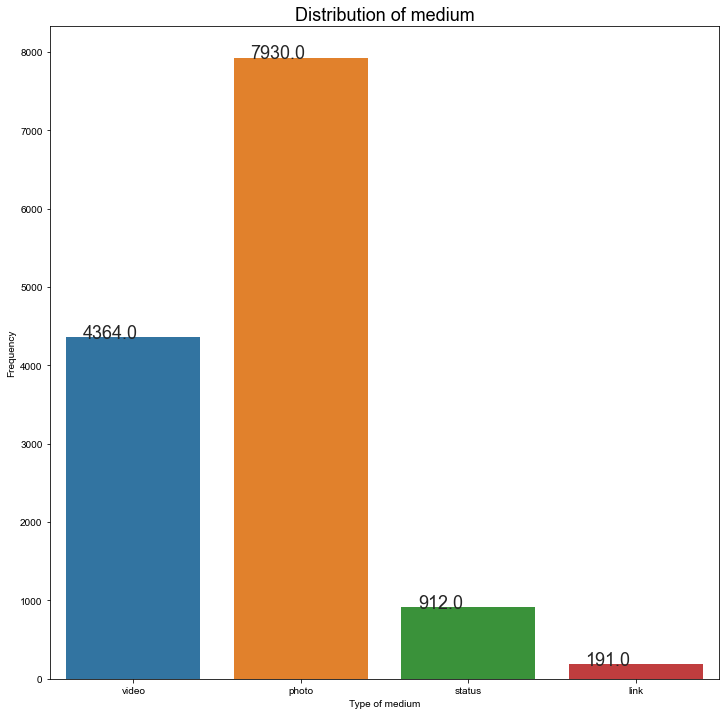

In [21]:
# [1] Import the necessary packages:
from matplotlib import pyplot as plt
import seaborn as sns

# [2] Generate the overall frame and [2a, b] the bars for the plot:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x="medium", data=df_fb)
sns.set(font_scale = 1.5)
sns.set_style("white")

# [3] Specify the plot title, x-axis label, and the y-axis label:
plt.title('Distribution of medium')
plt.xlabel('Type of medium')
plt.ylabel('Frequency')

# [4] Annotate the bars with values:
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50), va='center') 

# key: 3=video, 2=status, 1=photo, 0=link

Hmm, the data seems to be biased towards photos (7,930 instances) and video media (4,364 instances). This is good information because we can use medium as the target variable! More on this in the next step.

# 4. Specify the target variable

The target variables’ values are modelled and predicted by other variables. Therefore, the medium variable will be used to specify the weight given to a row in the data set. To do this, we need to specify the independent variable (X) and the dependent variable (y), and assign data to these variables. The code snippet will be:

In [22]:
# Define the independent variable.
X = df_fb 
# Define the dependent variable.
y = df_fb['medium'] 

Next, we need to convert the target variable to an integer(s).

In [23]:
# [1] Import the LabelEncoder class:
from sklearn.preprocessing import LabelEncoder

# [2] Create an object from the class.
le = LabelEncoder() 

# [3] Modify the DataFrame column with integer values:
X['medium'] = le.fit_transform(X['medium'])

y = le.transform(y)

In [24]:
# Check that label encoding happened correctly using the ‘info()’ method:
X.info()

# Check that label encoding happened correctly using the ‘head()’ method.
X.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13397 entries, 0 to 13396
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   medium     13397 non-null  int64
 1   reactions  13397 non-null  int64
 2   comments   13397 non-null  int64
 3   share      13397 non-null  int64
 4   like       13397 non-null  int64
 5   love       13397 non-null  int64
 6   excellent  13397 non-null  int64
 7   funny      13397 non-null  int64
 8   sad        13397 non-null  int64
 9   angry      13397 non-null  int64
 10  yes        13397 non-null  int64
 11  no         13397 non-null  int64
dtypes: int64(12)
memory usage: 1.2 MB


medium  reactions  comments  share  like  love  excellent  funny  sad  \
0       3        529       512    262   432    92          3      1    1   
1       1        150         0      0   150     0          0      0    0   
2       1         33         9      1    33     0          0      0    0   
3       1         72         1      0    72     0          0      0    0   
4       1        174         0      0   173     1          0      0    0   

   angry  yes  no  
0      0    1   0  
1      0    1   0  
2      0    0   1  
3      0    0   1  
4      0    0   1

Done. You’ve converted the data in the medium column (i.e. the target variable) to integer values, which are meaningful and will now inform the clusters we generate. While not always necessary, normalising data at this early stage in the data analysis process improves the accuracy and efficiency of k-means clustering algorithms, resulting in higher-quality, more reliable clusters.

# 5. Normalise the data set

To normalise the data set (and so improve the quality/accuracy of the output of our model):

In [25]:

# [1] Create an list with the column labels from X:
x_cols = X.columns

# [2] Import the MinMaxScaler class.
from sklearn.preprocessing import MinMaxScaler 

# [3] Create the object from ‘MinMaxScaler’.
ms = MinMaxScaler() 
# [4] Modify X to scale values between 0 and 1.
X = ms.fit_transform(X) 
# [5] Set X as equal to a new DataFrame.
X = pd.DataFrame(X, columns=[x_cols]) 

# [6] Check the contents of the modified DataFrame.
X.head() 

medium reactions  comments     share      like      love excellent  \
0  1.000000  0.112314  0.024393  0.076519  0.091720  0.140030  0.010791   
1  0.333333  0.031847  0.000000  0.000000  0.031847  0.000000  0.000000   
2  0.333333  0.007006  0.000429  0.000292  0.007006  0.000000  0.000000   
3  0.333333  0.015287  0.000048  0.000000  0.015287  0.000000  0.000000   
4  0.333333  0.036943  0.000000  0.000000  0.036730  0.001522  0.000000   

      funny       sad angry  yes   no  
0  0.006369  0.019608   0.0  1.0  0.0  
1  0.000000  0.000000   0.0  1.0  0.0  
2  0.000000  0.000000   0.0  0.0  1.0  
3  0.000000  0.000000   0.0  0.0  1.0  
4  0.000000  0.000000   0.0  0.0  1.0

Can you see the difference between this output and the previous output? The values were all scaled between 0 and 1, which is what we need in order to generate accurate clusters from the data.



# 6. Apply the clustering algorithm

The data is prepared! Now we can perform the clustering, using a special package in the sklearn library called KMeans. 

To get started with the cluster, we’ll use a k-value of 2 – just to see what the clusters look like at this lowest value. This will help us see how the clusters change when we increase the k-value. Later, we’ll determine the ideal number of clusters.

In [26]:
# [1] Import the KMeans class.
from sklearn.cluster import KMeans

# [2] Create the object and [2a] specify the parameters:
kmeans =KMeans(n_clusters=2, random_state=0)

# [3] Fit the k means to the data set.
kmeans.fit(X)


/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

Well done! The model is prepared, and we can fit it to the data set. Next, indicate to Python that the kmeans() function should be applied to the cluster_centers.

In [27]:
# Indicate ‘kmeans()’ applies to ‘cluster_centers’.
kmeans.cluster_centers_

array([[ 5.63676805e-01,  7.97700522e-02,  9.95437217e-03,
         8.62467332e-03,  7.72335167e-02,  1.53255728e-02,
         3.47878122e-03,  3.54252413e-03,  5.34012488e-03,
         2.56302437e-03, -1.57651669e-14,  1.00000000e+00],
       [ 5.72846253e-01,  7.96796690e-02,  8.01565154e-03,
         7.70376130e-03,  7.73781682e-02,  1.37259937e-02,
         3.70007460e-03,  2.84714200e-03,  4.87305522e-03,
         2.92749011e-03,  1.00000000e+00,  1.57651669e-14]])

The cluster centres were calculated. What does this mean? The k-means algorithm clusters data by trying to separate samples into a given number of groups of equal variances. This will minimise the inertia (which measures how well a data set was clustered by k-means; the lower the inertia the tighter/denser the cluster). 

The code snippet used the k-means algorithm to sort a set of samples of the data (X) into two disjoint clusters, each described by the mean of the samples in the cluster. These are also called cluster centroids. The k-means algorithm aims to choose centroids that minimise the variability of the data points/observations within each cluster (i.e. lower the inertia). 

Let’s see what the inertia was for this data set:

In [28]:
# Check the inertia for the data set.
kmeans.inertia_

1881.3383018237305

This value is very high. Inertia is not a normalised metric, but lower values are better – with zero as the optimal value. In this case, we don’t have a great fit for our data set. Remember that we’re working with a real-life business scenario. Real-life raw data is not always perfect, so high inertia is a common occurrence when performing k-means clustering.

# 7. Evaluate the output

As the inertia value was quite high, let’s evaluate the output. We can start by checking how many of the samples were labelled correctly. Remember that the first step before we can perform clustering is to label the data. The code snippet will be:

In [29]:
# [1] Extract the labels from the k means.
labels = kmeans.labels_

# [2] Add up correctly labelled instances. 
correct_labels = sum(y == labels)

# [3] Display the result.
print("Result: %a out of %a samples were correctly labeled."
     % (correct_labels, y.size))

print(' Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4157 out of 13397 samples were correctly labeled.
 Accuracy score: 0.31


Only 4,157 of the 13,397 samples (31%) were labelled correctly. This is not good. How can we improve the output to make it more accurate?

# 8. Improve the accuracy (elbow method)

Remember, we started with k=2. Let’s change this number. We can employ the elbow method to calculate the optimal number of clusters. The code snippet for the elbow method is:

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised i

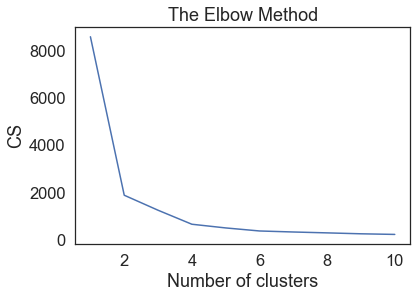

In [30]:
#elbow chart for us to decide on the number of optimal clusters
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()
#From the below chart we can take the optimal number as 4 

You've just created an elbow plot. According to the graph, the optimal number of clusters will be either three or four. Let’s investigate whether the accuracy improves, by testing k=3 and k=4. 

In [31]:
# [1] Create a k-means object with three clusters:
kmeans = KMeans(n_clusters=3, random_state=0)
# [2] Apply ‘fit()’, using the DataFrame, to the k-means object.
kmeans.fit(X) 

# [3] Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# [4] Display the accuracy score:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4665 out of 13397 samples were correctly labeled.
Accuracy score: 0.35


/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


The accuracy is only 35%, which is not too bad, but maybe we can improve the accuracy. Therefore, it seems the elbow method correctly indicated that three is not the optimal number of clusters. Let’s try k=4 and keep everything else the same.

In [32]:
# [1] Create a k-means object with three clusters:
kmeans = KMeans(n_clusters=4, random_state=0)
# [2] Apply ‘fit()’, using the DataFrame, to the k-means object.
kmeans.fit(X) 

# [3] Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# [4] Display the accuracy score:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 6545 out of 13397 samples were correctly labeled.
Accuracy score: 0.49


/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Fantastic! The accuracy is now 49% and a great improvement. You can try to fit the k=5 cluster. What do you see? Do you understand that k=4 will give you the best accuracy? Remember that if the “elbow” is not completely visible or clear, you can apply ‘trial and error’ to test different values for k.

# 9. Visualise the clusters

The last step is to visualise the data (clusters). You can play around with the figure size, but for illustrative purposes, we used dimensions of 26,6. The visualisation should be a 3D scatter plot, as we have three-axis (x='Reactions', y='Share', z='Like'). Let’s construct two scatter plots to indicate the number of reactions and the number of comments, using share and like. For the first scatter plot, we’ll indicate the number of reactions:

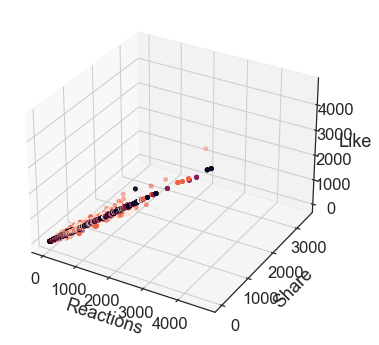

In [16]:
# [1] Create the figure area.
fig = plt.figure(figsize=(26,6)) 
# [2] Create a 3D projection area.
ax = fig.add_subplot(131, projection='3d') 

# [3] Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_fb['reactions'], df_fb['share'], 
 df_fb['like'], c=labels, s=15)

# [4] Set the label for each dimension:
ax.set_xlabel('Reactions')
ax.set_ylabel('Share')
ax.set_zlabel('Like')

# [5] Show the plot.
plt.show() 

Excellent! Now let’s repeat the process to indicate the number of comments (again, using share and like):

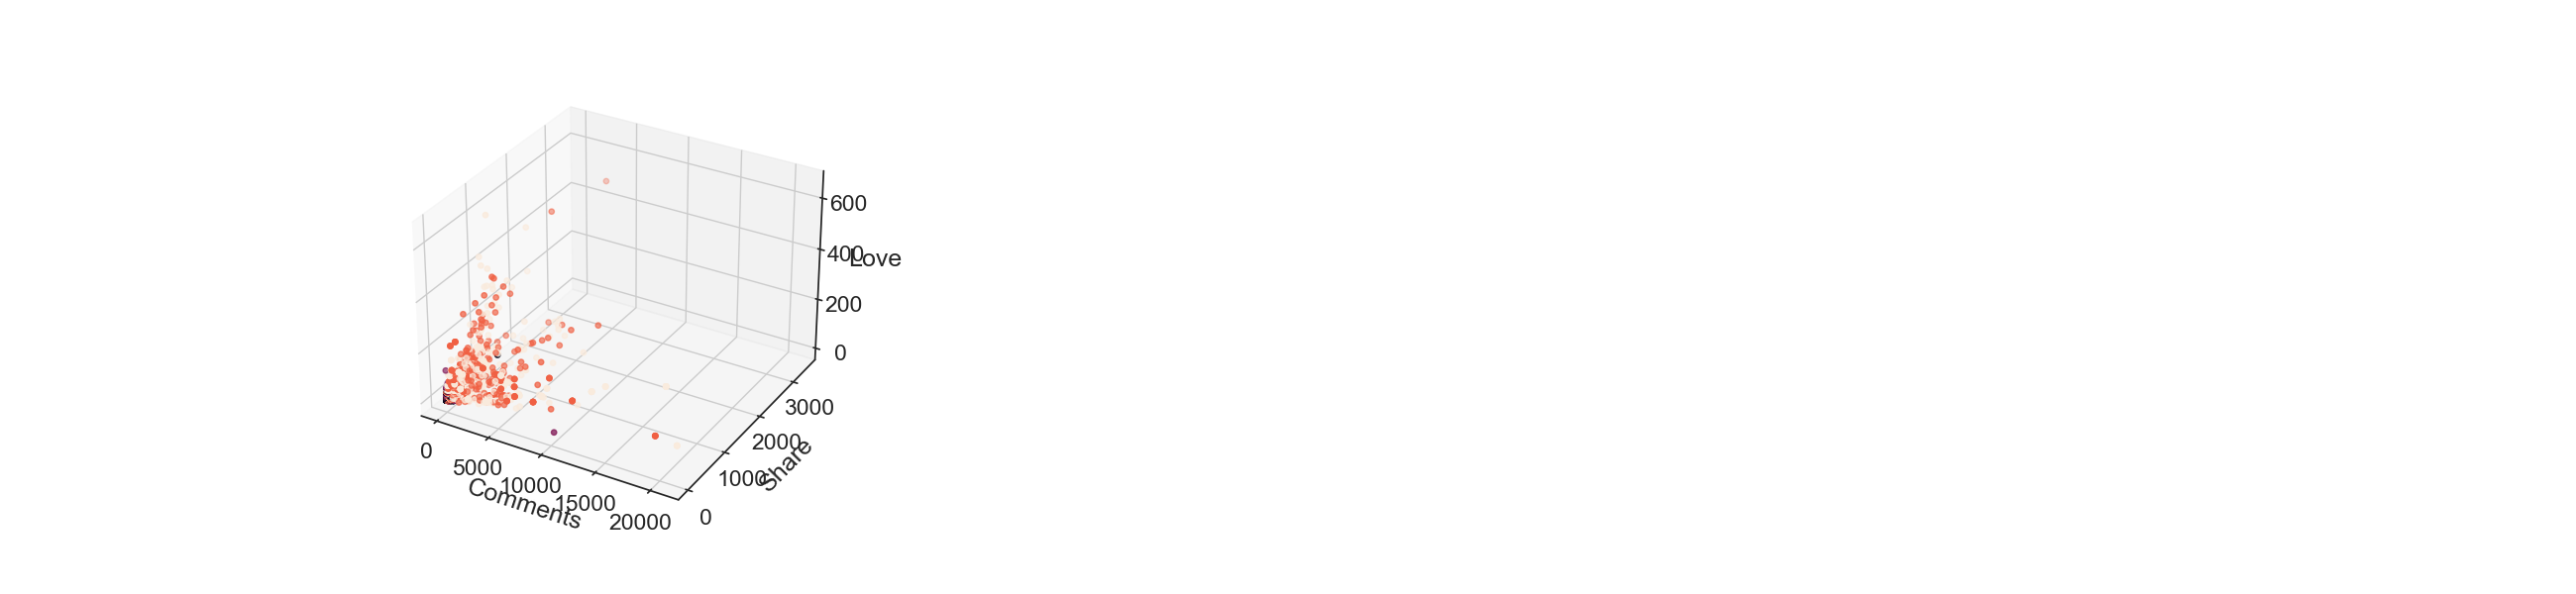

In [27]:
# [1] Create the figure area.
fig = plt.figure(figsize=(26,6)) 

# [2] Create a 3D projection area.
ax = fig.add_subplot(131, projection='3d') 

# [3] Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_fb['comments'], df_fb['share'], 
 df_fb['love'], c=labels, s=15)

# [4] Set the label for each dimension:
ax.set_xlabel('Comments')
ax.set_ylabel('Share')
ax.set_zlabel('Love')

# [5] Show the plot.
plt.show() 

Live selling (as discussed earlier in this section) is an increasingly popular sales technique that leads to more sales opportunities and a better customer journey. As such, data analysts are sought-after to provide insight into how customers are behaving in response to various mediums (e.g. photos, videos, and links). In this demonstration, you worked to identify the relevant clusters for customer reactions and comments.

In [66]:
kmeans.inertia_

501.14863204980475

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='love', ylabel='share'>

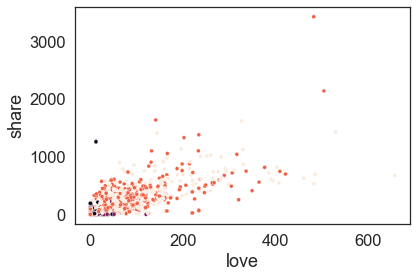

In [35]:
sns.scatterplot(df_fb['love'], df_fb['share'], c=labels, s=15)
